In [34]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the neural network parameters
def initialize(n_x, C1, C2):
    np.random.seed(10)
    W1 = np.random.randn(n_x, C1) * 0.1
    b1 = np.zeros((1, C1))
    W2 = np.random.randn(C1, C2) * 0.1
    b2 = np.zeros((1, C2))
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Softmax activation function
def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    A = expZ / expZ.sum(axis=1, keepdims=True)
    return A

# Forward propagation
def forward(W, X, b, activation=None):
    Z = np.dot(X, W) + b
    if activation == 'sigmoid':
        A = sigmoid(Z)
    elif activation == 'softmax':
        A = softmax(Z)
    else:
        A = Z
    return Z, A

def cost(A, Y):
    m = Y.shape[0]
    epsilon = 1e-15  # Small epsilon value to avoid log(0)
    logprobs = -np.log(A[np.arange(m), Y.argmax(axis=1)] + epsilon)
    cost = np.sum(logprobs) / m
    return cost

# Backward propagation
def backward(X, Y, A, Z, W, b, activation=None):
    m = X.shape[0]
    if activation == 'softmax':
        dZ = A - Y
        dW = np.dot(X.T, dZ) / m
        db = np.sum(dZ, axis=0, keepdims=True) / m
    elif activation == 'sigmoid':
        dZ = np.dot(cache[1],cache[0])*A*(1-A)
        dW = np.dot(X.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)
    else:
        dZ = A
        dW = np.dot(X.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)
        # You might want to implement derivatives for other activations here if needed
    return dW, db, dZ


# Update the parameters
def update(W, b, dW, db, learning_rate):
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b

# Train the neural network
def train(X_train, y_train, W1, b1, W2, b2, learning_rate, epochs):
    costs = []
    for epoch in range(epochs):
        # Forward propagation
        Z1, A1 = forward(W1, X_train, b1, 'sigmoid')
        Z2, A2 = forward(W2, A1, b2, 'softmax')
        
        # Compute the cost
        J = cost(A2, y_train)
        costs.append(J)
        
        # Backward propagation
        dW2, db2, _ = backward(A1, y_train, A2, Z2, W2, b2, 'softmax')
        dW1, db1, _ = backward(X_train, y_train, A1, Z1, W1, b1)
        
        # Update parameters
        W1, b1 = update(W1, b1, dW1, db1, learning_rate)
        W2, b2 = update(W2, b2, dW2, db2, learning_rate)
        
        # Print the cost every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost {J}")
    
    return W1, b1, W2, b2, costs

# Train the neural network
input_size = X_train.shape[1]
# hidden_layer_size1 = 72
hidden_layer_size1 = 102
hidden_layer_size2 = 3
# learning_rate = 0.000001
learning_rate = 0.0000000001
epochs = 1500

W1, b1, W2, b2 = initialize(input_size, hidden_layer_size1, hidden_layer_size2)
costs = train(X_train, y_train, W1, b1, W2, b2 , learning_rate, epochs)

# Predict using the trained model
def predict(X, W1, b1, W2, b2):
    _, A1 = forward(W1, X, b1)
    _, A2 = forward(W2, A1, b2, 'softmax')
    return np.argmax(A2, axis=1)

# Make predictions on the test set
y_pred = predict(X_test, W1, b1, W2, b2)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
cfm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy * 100}%")
print("Confusion Matrix:\n", cfm)
#finding accuracy from the confusion matrix.
a = cfm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cfm[row,c]
        else:
            falsePred += cfm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
ANNAccuracy = corrPred/(cfm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cfm.sum()))

Epoch 0: Cost 1.1495457676366183
Epoch 100: Cost 1.1495457309409673
Epoch 200: Cost 1.1495456942453515
Epoch 300: Cost 1.1495456575497724
Epoch 400: Cost 1.1495456208542298
Epoch 500: Cost 1.1495455841587234
Epoch 600: Cost 1.1495455474632537
Epoch 700: Cost 1.1495455107678192
Epoch 800: Cost 1.1495454740724225
Epoch 900: Cost 1.1495454373770613
Epoch 1000: Cost 1.1495454006817374
Epoch 1100: Cost 1.1495453639864484
Epoch 1200: Cost 1.1495453272911964
Epoch 1300: Cost 1.149545290595981
Epoch 1400: Cost 1.1495452539008022
Accuracy: 86.66666666666667%
Confusion Matrix:
 [[11  0  0]
 [ 0  8  1]
 [ 0  3  7]]
Correct predictions:  26
False predictions 4
Accuracy of the SVC Clasification is:  0.8666666666666667


ValueError: Input could not be cast to an at-least-1D NumPy array

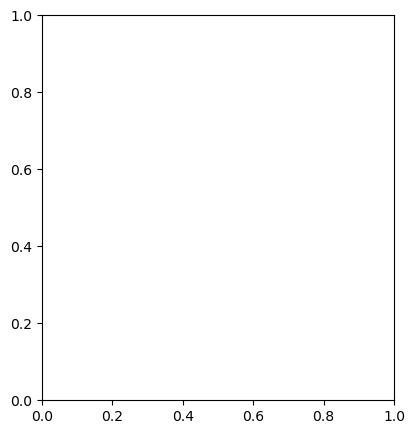

In [42]:
# Plot cost history
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs. Epoch")